# 파이썬 활용 디지털마케팅 데이터분석 및 기획

# Today's mission

- 고객 Funnel 분석
- 문제 정의 및 가설 설정  
  (문제정의, 가설 정립 및 예상 결과)
- 분석 프레임  
  (MECE 방법론, 타당도와 신뢰도, 로직 트리, 추가 고려요소)
- 데이터 전처리  
  (데이터 전처리 가이드라인, 전처리 실습)
- 고객 Funnel 분석 : 분석(일별 통계, 변수별 통계, 구간별 전환율, 클러스터별 차이)
- 고객 Funnel 분석 : 보고서 작성

]

## Day03-2A Funnel 분석 - 데이터 전처리

- 데이터 전처리  
  (데이터 전처리 가이드라인, 전처리 실습)

목적을 정의했고 가설 정립 및 분석 Frame 단계를 마쳤다면,  
실제 데이터를 수집/추출하여 분석 단계를 준비하는 데이터 전처리 단계를 진행한다.  
수집/추출 단계는 데이터 엔지니어의 역할이 크고, 또 이 수업의 범위를 벗어난 내용이므로 생략한다.  

단, 이러한 수집/추출 과정에서 무엇을 수집할지 그리고 데이터의 Quality를 파악하는 것은 분석가가 관여하는 부분임을 인지할 필요가 있다.  
일반적으로 아래와 같은 이유로 바로 실제 분석을 하기 전, 데이터 전처리 단계를 반드시 거쳐야 한다.

- 여러 데이터 소스 활용: 테이블 스키마나 Label, Type 등이 상이하여, 분석을 위해 일관적인 방식으로 통합/변환 필요
- 데이터 기록/수집의 누락 및 오류 (Missing Value, Errors, typo 발생)
- 자연스러운 혹은 기계적으로 발생하는 이상치 or 극단치
- 분석 목적에 맞지 않은 변수 혹은 분포

### 데이터 전처리 가이드

위에 나열된 내용 이외에도 예상하지 못한 이유로 인해 결측치 및 이상치 등이 쉽게 발생할 수 있으며,  
이러한 문제가 있는 데이터를 전처리하지 않고 분석 혹은 모델링 등의 업무를 진행할 경우  
치명적인 문제/오류를 발생시킬 수 있으므로 매우 주의할 필요가 있다.  

일반적으로 각 문제점별 데이터 전처리를 하는 방식은 아래와 같다.

- 데이터 Type, Label 등이 일관적이지 않은 경우
  - 프로그램에서 제공하는 함수를 통해 일괄적으로 변경 (예, SQL: Cast, Python: astype())
- Missing Value
  - 수치형인 경우 Mean, Median 등 대푯값으로 채우거나 실수 예측 모델링 활용 (예, Linear Regression)
  - 카테고리형인 경우 Mode로 채우거나 분류 예측 모델링 활용 (예, Logistic Regression)
- Errors, Typo 발생의 경우
  - 텍스트 처리 함수 활용 (예, Python: str.replace())
- 이상치(outlier)
  - IQR, Z-score, MAD 등 방식으로 이상치 제거
- 변수가 많은 경우(20개 이상)
  - PCA 등으로 차원 축소하거나 변수 중요도 파악후 불필요 변수 제거
- 편향된 분포의 변수가 존재하는 경우
  - log, sqrt 등 함수로 분포 변환
- 측정 단위(scale)이 차이가 클 경우
  - StarndardScaler or MinMaxScaler 통해 스케일링

]

## Day03-2B Funnel 분석 (실습) - 데이터 전처리 (1)

In [1]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# plt.style.use('seaborn-paper')

# Read the Dataset

### File Info.
- 문서 앱내 사용시 발생하는 클라이언 로그 데이터 (after parsed)
- 서버로그와 달리, 유저의 행동이 발생할 경우 로그 수집 (유저 행동 패턴 파악에 용이)
    - 클라이언트(앱) 로그
    - 서버 로그

In [2]:
df = pd.read_csv("data/df_funnel.csv", index_col=0)

### Columns Info.
- actiontype: 문서 이용시 행동(OPEN, CLOSE, SAVE,,)
- ismydoc: 내문서 해당 여부(중요x)
- ext: 문서 확장자
- sessionid: 유저 식별자
- documentposition: 문서 이용시 위치 정보(CLOUD, OTHERAPP)
- datetime: Timestamp
- screen: 앱내 화면 이름

In [3]:
df.head(5)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016.7.6,Main


In [4]:
df.tail(5)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
301856,CLOSE,View,XLSX,2ed068d5e6a72e80e4a997c01c59f782,OTHERAPP,2016.7.7,Main
301857,OPEN,NoView,DOCX,41b8c1df291edd2aec30fc610e5b676e,OTHERAPP,2016.7.5,Main
301858,RESET,View,DOCX,41b8c1df291edd2aec30fc610e5b676e,OTHERAPP,2016.7.5,Main
301859,OPEN,NoView,PPT,9b5ee236571c2fcbe25132b6ba71d764,OTHERAPP,2016.7.14,Main
301860,CLOSE,NoView,PPT,9b5ee236571c2fcbe25132b6ba71d764,OTHERAPP,2016.7.14,Main


In [5]:
# key info => data entires, missing values, type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301861 entries, 0 to 301860
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   actiontype        301861 non-null  object
 1   ismydoc           301861 non-null  object
 2   ext               301861 non-null  object
 3   sessionid         301861 non-null  object
 4   documentposition  301861 non-null  object
 5   datetime          301861 non-null  object
 6   screen            301861 non-null  object
dtypes: object(7)
memory usage: 18.4+ MB


### Preprocessing
- 데이터 타입 변환
- 데이터 값 변경
- 결측치 처리
- 신규 session id 부여
- 대소문자 처리

### 날짜를 pandas datetime 형태로 변환하기
참고 : [판다스 데이트타임](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

```python
pandas.to_datetime()
```

In [6]:
# if datetime is string? no sort 
df.groupby("datetime").size().head(15)

datetime
2016.7.1     11836
2016.7.10     6750
2016.7.11    10075
2016.7.12    12340
2016.7.13    12159
2016.7.14    11721
2016.7.15    11057
2016.7.16     8513
2016.7.17     6906
2016.7.18     9987
2016.7.19    11872
2016.7.2      8884
2016.7.20    11912
2016.7.21    11599
2016.7.22    11250
dtype: int64

In [7]:
df.groupby("datetime").count().head(15)

,actiontype,ismydoc,ext,sessionid,documentposition,screen
datetime,,,,,,
2016.7.1,11836,11836,11836,11836,11836,11836
2016.7.10,6750,6750,6750,6750,6750,6750
2016.7.11,10075,10075,10075,10075,10075,10075
2016.7.12,12340,12340,12340,12340,12340,12340
2016.7.13,12159,12159,12159,12159,12159,12159
2016.7.14,11721,11721,11721,11721,11721,11721
2016.7.15,11057,11057,11057,11057,11057,11057
2016.7.16,8513,8513,8513,8513,8513,8513
2016.7.17,6906,6906,6906,6906,6906,6906


참고 : [count()와 size()의 차이점](https://blog.naver.com/PostView.nhn?blogId=youji4ever&logNo=222405683851)

> 결과를 살펴보면 count() 함수는 NaN은 제외하고 계산하였고, size는 NaN도 포함해서 계산을 한다.

In [8]:
## case 1. if date type is string,
str_date = ['2018/01/01', '2018.01.02', '2018-01-03', '2018-01-04', '2018/01/05'] # string type
str_date

['2018/01/01', '2018.01.02', '2018-01-03', '2018-01-04', '2018/01/05']

In [9]:
pd.to_datetime(str_date, format='mixed', errors='coerce') # parsed  format='mixed', errors='coerce')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq=None)

In [10]:
pd.Series(pd.to_datetime(str_date, format='mixed', errors='coerce')) # to pd.series

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
dtype: datetime64[ns]

In [11]:
## case 2. 날짜가 timestamp인 경우
ts_date = [1349720105, 1349806505, 1349892905, 1349979305, 1350065705]
ts_date

[1349720105, 1349806505, 1349892905, 1349979305, 1350065705]

In [12]:
pd.Series(pd.to_datetime([1530837876, 1530751476, 1530665076, 1530578676, 1530492276], unit='s')).dt.date

0    2018-07-06
1    2018-07-05
2    2018-07-04
3    2018-07-03
4    2018-07-02
dtype: object

- timestamp converter: https://www.epochconverter.com/

> 참고 : [타임스탬프(TimeStamp)와 Epoch Time의 유래](https://m.blog.naver.com/techtrip/221672212122)

In [13]:
## case 3. 컬럼 타입만 바꾸는 경우
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301861 entries, 0 to 301860
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   actiontype        301861 non-null  object
 1   ismydoc           301861 non-null  object
 2   ext               301861 non-null  object
 3   sessionid         301861 non-null  object
 4   documentposition  301861 non-null  object
 5   datetime          301861 non-null  object
 6   screen            301861 non-null  object
dtypes: object(7)
memory usage: 18.4+ MB


In [14]:
df.head() # object = string

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016.7.6,Main


In [15]:
# option1. string to datetime
df['datetime'].astype('datetime64[ns]').head()

0   2016-07-18
1   2016-07-18
2   2016-07-18
3   2016-07-18
4   2016-07-06
Name: datetime, dtype: datetime64[ns]

In [16]:
# option2.
pd.to_datetime(df['datetime']).head()

0   2016-07-18
1   2016-07-18
2   2016-07-18
3   2016-07-18
4   2016-07-06
Name: datetime, dtype: datetime64[ns]

In [17]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301861 entries, 0 to 301860
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   actiontype        301861 non-null  object        
 1   ismydoc           301861 non-null  object        
 2   ext               301861 non-null  object        
 3   sessionid         301861 non-null  object        
 4   documentposition  301861 non-null  object        
 5   datetime          301861 non-null  datetime64[ns]
 6   screen            301861 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 18.4+ MB


In [19]:
df.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main


<Axes: xlabel='datetime'>

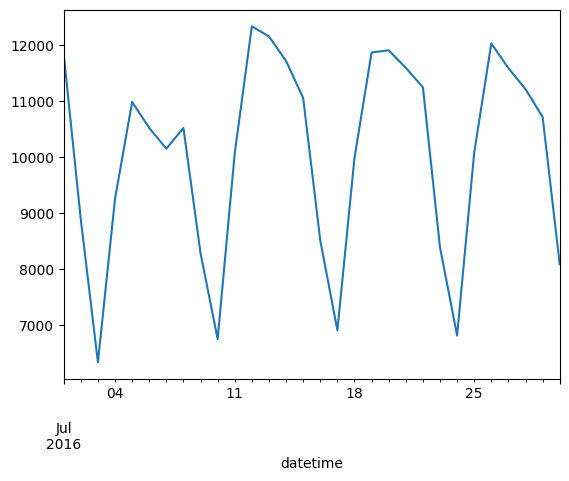

In [20]:
df.groupby("datetime").size().plot()

# count()와 size() 차이점
# https://blog.naver.com/PostView.nhn?blogId=youji4ever&logNo=222405683851

- Pandas Datetime API
    - https://pandas.pydata.org/pandas-docs/stable/timeseries.html
    - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.html

In [21]:
# day to year
df['datetime'].dt.year[:10]

0    2016
1    2016
2    2016
3    2016
4    2016
5    2016
6    2016
7    2016
8    2016
9    2016
Name: datetime, dtype: int32

In [22]:
# day to month
df['datetime'].dt.month[:10]

0    7
1    7
2    7
3    7
4    7
5    7
6    7
7    7
8    7
9    7
Name: datetime, dtype: int32

In [23]:
# day to day
df['datetime'].dt.day[:10]

0    18
1    18
2    18
3    18
4     6
5     6
6    20
7    20
8    28
9    28
Name: datetime, dtype: int32

**Quiz**
- df 데이터프레임에 새로운 컬럼(요일) 생성
1. df['dayofweek']: 요일 
2. 요일별 로그 수 카운트
3. 요일 컬럼 삭제

In [24]:
df['dayofweek'] = df['datetime'].dt.dayofweek

In [25]:
df.groupby("dayofweek").size()#.plot()

dayofweek
0    39403
1    47234
2    46189
3    44689
4    55386
5    42157
6    26803
dtype: int64

In [26]:
df.drop(columns=['dayofweek'])

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main
...,...,...,...,...,...,...,...
301856,CLOSE,View,XLSX,2ed068d5e6a72e80e4a997c01c59f782,OTHERAPP,2016-07-07,Main
301857,OPEN,NoView,DOCX,41b8c1df291edd2aec30fc610e5b676e,OTHERAPP,2016-07-05,Main
301858,RESET,View,DOCX,41b8c1df291edd2aec30fc610e5b676e,OTHERAPP,2016-07-05,Main
301859,OPEN,NoView,PPT,9b5ee236571c2fcbe25132b6ba71d764,OTHERAPP,2016-07-14,Main


## Day03-2B Funnel 분석 (실습) - 데이터 전처리 (2)

### Missing value 확인

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301861 entries, 0 to 301860
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   actiontype        301861 non-null  object        
 1   ismydoc           301861 non-null  object        
 2   ext               301861 non-null  object        
 3   sessionid         301861 non-null  object        
 4   documentposition  301861 non-null  object        
 5   datetime          301861 non-null  datetime64[ns]
 6   screen            301861 non-null  object        
 7   dayofweek         301861 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(6)
memory usage: 19.6+ MB


In [28]:
df.isnull().sum()

actiontype          0
ismydoc             0
ext                 0
sessionid           0
documentposition    0
datetime            0
screen              0
dayofweek           0
dtype: int64

### 결측치 처리

- **Drop**
    - 경우에 따라 결측치 처리 방법이 달라진다.
    - 샘플수가 많다면 missing values 를 포함하는 행을 모두 삭제하는 것이 가능하다

```python
# 결측치가 하나라도 있으면 버리는 코드 예제
df.dropna()

# 모든 값이 Null일 경우만 버리는 코드 예제
df.dropna(how='all')

# 결측치가 하나 이상 있는 Case만 선택하는 코드 예제
df[df.isnull().any(axis=1)]
```

- **Imputation**
    - 만약 샘플수가 충분하지 않을 경우, Pandas의 fillna() 명령어로 Null 값을 채우는 것이 가능하다. 
      - 연속형인 경우 Mean이나 Median을 이용하고 
      - 명목형인 경우 Mode(최빈치)나 예측 모형을 통해 Null 값을 대체할 수 있다.

```python
# Null 값을 median으로 대체하는 코드 예제
df.fillna(df.mean()) 
```

- **Reference**
    - https://machinelearningmastery.com/handle-missing-data-python/

In [29]:
df_by_screen = df.groupby(["datetime", "screen"])['sessionid'].nunique().unstack()

In [30]:
df_by_screen[:10]

screen,InProduct_Mob,InProduct_Web,Main,Per_Dir,Pub_Dir,Purchase_done,Purchase_page
datetime,,,,,,,
2016-07-01,137.0,147.0,3582.0,296.0,1008.0,2.0,23.0
2016-07-02,89.0,124.0,2683.0,206.0,801.0,2.0,15.0
2016-07-03,50.0,83.0,1886.0,165.0,590.0,NaN,28.0
2016-07-04,112.0,104.0,2808.0,281.0,764.0,NaN,29.0
2016-07-05,118.0,138.0,3335.0,300.0,842.0,1.0,26.0
2016-07-06,138.0,145.0,3256.0,293.0,855.0,1.0,30.0
2016-07-07,110.0,117.0,3150.0,266.0,807.0,NaN,18.0
2016-07-08,117.0,148.0,3208.0,273.0,865.0,2.0,20.0
2016-07-09,102.0,138.0,2381.0,229.0,748.0,2.0,23.0


In [31]:
df_by_screen.isnull().sum()

screen
InProduct_Mob    0
InProduct_Web    0
Main             0
Per_Dir          0
Pub_Dir          0
Purchase_done    6
Purchase_page    0
dtype: int64

In [32]:
df_by_screen.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2016-07-01 to 2016-07-30
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InProduct_Mob  30 non-null     float64
 1   InProduct_Web  30 non-null     float64
 2   Main           30 non-null     float64
 3   Per_Dir        30 non-null     float64
 4   Pub_Dir        30 non-null     float64
 5   Purchase_done  24 non-null     float64
 6   Purchase_page  30 non-null     float64
dtypes: float64(7)
memory usage: 1.9 KB


- 비즈니스 맥락 및 목적(퍼널분석)을 고려했을 때, 이 경우는 결측치를 0으로 처리하는 것이 적당하다고 판단됨.

In [33]:
df_by_screen.fillna(0)[:10]

screen,InProduct_Mob,InProduct_Web,Main,Per_Dir,Pub_Dir,Purchase_done,Purchase_page
datetime,,,,,,,
2016-07-01,137.0,147.0,3582.0,296.0,1008.0,2.0,23.0
2016-07-02,89.0,124.0,2683.0,206.0,801.0,2.0,15.0
2016-07-03,50.0,83.0,1886.0,165.0,590.0,0.0,28.0
2016-07-04,112.0,104.0,2808.0,281.0,764.0,0.0,29.0
2016-07-05,118.0,138.0,3335.0,300.0,842.0,1.0,26.0
2016-07-06,138.0,145.0,3256.0,293.0,855.0,1.0,30.0
2016-07-07,110.0,117.0,3150.0,266.0,807.0,0.0,18.0
2016-07-08,117.0,148.0,3208.0,273.0,865.0,2.0,20.0
2016-07-09,102.0,138.0,2381.0,229.0,748.0,2.0,23.0


In [34]:
# dropna with 'how' param
df_by_screen.dropna(how='any')[:10] # how='all' or 'any'

screen,InProduct_Mob,InProduct_Web,Main,Per_Dir,Pub_Dir,Purchase_done,Purchase_page
datetime,,,,,,,
2016-07-01,137.0,147.0,3582.0,296.0,1008.0,2.0,23.0
2016-07-02,89.0,124.0,2683.0,206.0,801.0,2.0,15.0
2016-07-05,118.0,138.0,3335.0,300.0,842.0,1.0,26.0
2016-07-06,138.0,145.0,3256.0,293.0,855.0,1.0,30.0
2016-07-08,117.0,148.0,3208.0,273.0,865.0,2.0,20.0
2016-07-09,102.0,138.0,2381.0,229.0,748.0,2.0,23.0
2016-07-10,62.0,122.0,1872.0,230.0,636.0,2.0,18.0
2016-07-12,138.0,157.0,3646.0,371.0,1000.0,4.0,26.0
2016-07-13,132.0,172.0,3544.0,334.0,988.0,1.0,35.0


In [35]:
df_by_screen.dropna(how='all')[:10] # how='all' or 'any'

screen,InProduct_Mob,InProduct_Web,Main,Per_Dir,Pub_Dir,Purchase_done,Purchase_page
datetime,,,,,,,
2016-07-01,137.0,147.0,3582.0,296.0,1008.0,2.0,23.0
2016-07-02,89.0,124.0,2683.0,206.0,801.0,2.0,15.0
2016-07-03,50.0,83.0,1886.0,165.0,590.0,NaN,28.0
2016-07-04,112.0,104.0,2808.0,281.0,764.0,NaN,29.0
2016-07-05,118.0,138.0,3335.0,300.0,842.0,1.0,26.0
2016-07-06,138.0,145.0,3256.0,293.0,855.0,1.0,30.0
2016-07-07,110.0,117.0,3150.0,266.0,807.0,NaN,18.0
2016-07-08,117.0,148.0,3208.0,273.0,865.0,2.0,20.0
2016-07-09,102.0,138.0,2381.0,229.0,748.0,2.0,23.0


In [36]:
# select ony rows, including NaN
df_by_screen[df_by_screen.isnull().any(axis=1)]

screen,InProduct_Mob,InProduct_Web,Main,Per_Dir,Pub_Dir,Purchase_done,Purchase_page
datetime,,,,,,,
2016-07-03,50.0,83.0,1886.0,165.0,590.0,NaN,28.0
2016-07-04,112.0,104.0,2808.0,281.0,764.0,NaN,29.0
2016-07-07,110.0,117.0,3150.0,266.0,807.0,NaN,18.0
2016-07-11,125.0,139.0,2944.0,332.0,801.0,NaN,26.0
2016-07-18,133.0,162.0,2882.0,317.0,841.0,NaN,30.0
2016-07-19,124.0,137.0,3552.0,331.0,934.0,NaN,24.0


In [37]:
# fill NaN with median
df_by_screen.fillna(df_by_screen.median())[:10] # mean, max, min ..

screen,InProduct_Mob,InProduct_Web,Main,Per_Dir,Pub_Dir,Purchase_done,Purchase_page
datetime,,,,,,,
2016-07-01,137.0,147.0,3582.0,296.0,1008.0,2.0,23.0
2016-07-02,89.0,124.0,2683.0,206.0,801.0,2.0,15.0
2016-07-03,50.0,83.0,1886.0,165.0,590.0,2.0,28.0
2016-07-04,112.0,104.0,2808.0,281.0,764.0,2.0,29.0
2016-07-05,118.0,138.0,3335.0,300.0,842.0,1.0,26.0
2016-07-06,138.0,145.0,3256.0,293.0,855.0,1.0,30.0
2016-07-07,110.0,117.0,3150.0,266.0,807.0,2.0,18.0
2016-07-08,117.0,148.0,3208.0,273.0,865.0,2.0,20.0
2016-07-09,102.0,138.0,2381.0,229.0,748.0,2.0,23.0


## Day03-2B Funnel 분석 (실습) - 데이터 전처리 (3)

### 결측치가 카테고리 변수인 경우

경우에 따라 도메인 지식을 이용해 결측치를 처리하거나, 회귀 및 분류 예측모델을 이용하는 경우도 있다.

- Option 1. 최빈치(mode)
    - 쉽고 빠르게 이용가능하나, 낮은 적절성
- Option 2. 예측모형으로 예측치
    - 적절성은 비교적 높으나 별도의 모형과 계산량 필요

In [38]:
df.head(10)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,2
5,RESET,View,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,2
6,CLOSE,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main,2
7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main,2
8,OPEN,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main,3
9,CLOSE,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main,3


In [39]:
df_ms = df.copy() # it helps to test any code or functions
df_ms

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,2
...,...,...,...,...,...,...,...,...
301856,CLOSE,View,XLSX,2ed068d5e6a72e80e4a997c01c59f782,OTHERAPP,2016-07-07,Main,3
301857,OPEN,NoView,DOCX,41b8c1df291edd2aec30fc610e5b676e,OTHERAPP,2016-07-05,Main,1
301858,RESET,View,DOCX,41b8c1df291edd2aec30fc610e5b676e,OTHERAPP,2016-07-05,Main,1
301859,OPEN,NoView,PPT,9b5ee236571c2fcbe25132b6ba71d764,OTHERAPP,2016-07-14,Main,3


In [40]:
df_ms.loc[2, 'documentposition'] = np.nan
df_ms.loc[5, 'documentposition'] = np.nan
df_ms.loc[7, 'documentposition'] = np.nan
df_ms.loc[10, 'documentposition'] = np.nan
df_ms.loc[11, 'documentposition'] = np.nan
df_ms.loc[15, 'documentposition'] = np.nan

In [41]:
df_ms.head(10)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,NaN,2016-07-18,Pub_Dir,0
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,2
5,RESET,View,PDF,f191063c562691041dfa935ff0876975,NaN,2016-07-06,Main,2
6,CLOSE,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main,2
7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,NaN,2016-07-20,Main,2
8,OPEN,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main,3
9,CLOSE,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main,3


In [42]:
# frequency table
df_ms.documentposition.value_counts()

documentposition
OTHERAPP          213775
MYPOLARISDRIVE     55518
LOCALSTORAGE       18922
NEWDOCUMENT         7612
NONE                4335
OTHERCLOUD          1617
SHAREDDOCUMENT        76
Name: count, dtype: int64

In [109]:
# fillna with most frequent value (MODE)
freq_values = df_ms.documentposition.value_counts().index[0]

In [44]:
freq_values

'OTHERAPP'

In [45]:
df_ms['documentposition'] = df_ms['documentposition'].fillna(freq_values)

In [46]:
df_ms.head(10)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,OTHERAPP,2016-07-18,Pub_Dir,0
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,2
5,RESET,View,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,2
6,CLOSE,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main,2
7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main,2
8,OPEN,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main,3
9,CLOSE,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main,3


In [47]:
# let's use a machine learning model to deal with nulls
df_ms.loc[2, 'documentposition'] = np.nan
df_ms.loc[5, 'documentposition'] = np.nan
df_ms.loc[7, 'documentposition'] = np.nan
df_ms.loc[10, 'documentposition'] = np.nan
df_ms.loc[11, 'documentposition'] = np.nan
df_ms.loc[15, 'documentposition'] = np.nan

In [48]:
df_ms.head(10)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,NaN,2016-07-18,Pub_Dir,0
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,2
5,RESET,View,PDF,f191063c562691041dfa935ff0876975,NaN,2016-07-06,Main,2
6,CLOSE,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main,2
7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,NaN,2016-07-20,Main,2
8,OPEN,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main,3
9,CLOSE,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main,3


In [49]:
# fill na using predictive model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [50]:
# train without na
df_ms1 = df_ms.dropna()

In [51]:
# set independent cols
ind_cols = ['actiontype', 'ismydoc', 'ext', 'screen']

In [52]:
# split ind, tar
X = df_ms1[ind_cols]
y = df_ms1[['documentposition']]

In [53]:
X.head(10) # independent vars

,actiontype,ismydoc,ext,screen
0,OPEN,NoView,PDF,Per_Dir
1,CLOSE,NoView,PDF,Per_Dir
3,CLOSE,View,PDF,Pub_Dir
4,OPEN,NoView,PDF,Main
6,CLOSE,NoView,PDF,Main
8,OPEN,NoView,PDF,Main
9,CLOSE,NoView,PDF,Main
12,CLOSE,NoView,PDF,Main
13,RESET,View,PDF,Main
14,OPEN,View,PDF,Pub_Dir


In [54]:
y[:10] # target vars

,documentposition
0,LOCALSTORAGE
1,LOCALSTORAGE
3,MYPOLARISDRIVE
4,OTHERAPP
6,OTHERAPP
8,OTHERAPP
9,OTHERAPP
12,OTHERAPP
13,OTHERAPP
14,MYPOLARISDRIVE


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
encoder = LabelEncoder()

In [57]:
X = X.apply(lambda x: encoder.fit_transform(x))
y = y.apply(lambda y: encoder.fit_transform(y))

In [58]:
X.head(10)

,actiontype,ismydoc,ext,screen
0,3,0,5,3
1,0,0,5,3
3,0,1,5,4
4,3,0,5,2
6,0,0,5,2
8,3,0,5,2
9,0,0,5,2
12,0,0,5,2
13,4,1,5,2
14,3,1,5,4


In [59]:
y[:10]

,documentposition
0,0
1,0
3,1
4,4
6,4
8,4
9,4
12,4
13,4
14,1


In [60]:
## the cross validation phase
# X: df_ms_ind / y: df_ms_tar

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [61]:
print(X.shape)
print(y.shape)

(301855, 4)
(301855, 1)


In [62]:
print(X_train.shape, y_train.shape)

(226391, 4) (226391, 1)


In [63]:
print(X_test.shape, y_test.shape)

(75464, 4) (75464, 1)


[KNN Algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
![img](https://i0.wp.com/adataanalyst.com/wp-content/uploads/2016/07/kNN-1.png?)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

knn

KNeighborsClassifier()

In [66]:
print(knn.score(X_train, y_train)) # Quiz. score 의미가 무엇일까?

0.9999072401288037


In [67]:
print(knn.score(X_test, y_test)) # 만약 train 에서 score가 높고 test에서 score가 낮았다면?

0.9998409837803456


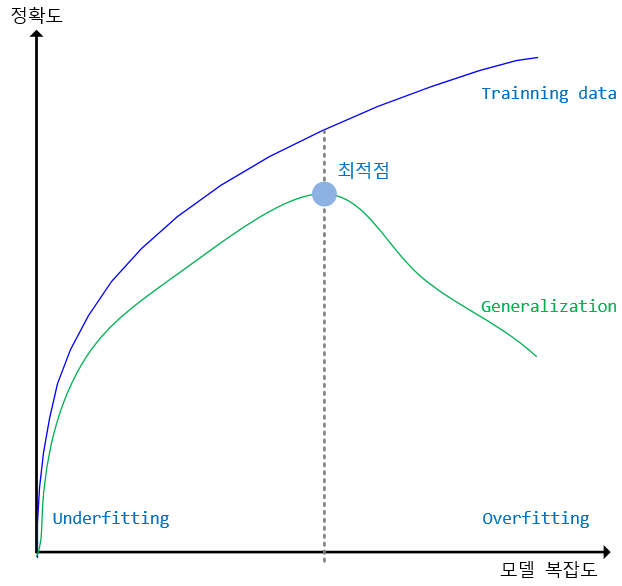

In [68]:
knn_pred = knn.predict(X_test)
knn_pred[:20]

array([1, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 2, 4, 1, 4, 0, 4, 1, 4, 4])

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
print(confusion_matrix(y_test, knn_pred))

[[ 4736     0     0     0     0     0     0]
 [    3 13894     0     0     0     0     0]
 [    0     0  1920     0     3     0     0]
 [    0     0     1  1085     1     0     0]
 [    0     0     1     0 53384     0     0]
 [    0     0     0     0     0   414     0]
 [    0     2     0     0     0     1    19]]


In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4736
           1       1.00      1.00      1.00     13897
           2       1.00      1.00      1.00      1923
           3       1.00      1.00      1.00      1087
           4       1.00      1.00      1.00     53385
           5       1.00      1.00      1.00       414
           6       1.00      0.86      0.93        22

    accuracy                           1.00     75464
   macro avg       1.00      0.98      0.99     75464
weighted avg       1.00      1.00      1.00     75464



In [72]:
pd.Series(knn_pred).value_counts().sort_index()

0     4739
1    13896
2     1922
3     1085
4    53388
5      415
6       19
Name: count, dtype: int64

In [73]:
class_cd = pd.Series(encoder.classes_).to_dict()

class_cd

{0: 'LOCALSTORAGE',
 1: 'MYPOLARISDRIVE',
 2: 'NEWDOCUMENT',
 3: 'NONE',
 4: 'OTHERAPP',
 5: 'OTHERCLOUD',
 6: 'SHAREDDOCUMENT'}

In [74]:
# let's impute the null values with the knn predictive model
df_ms.head(10)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,NaN,2016-07-18,Pub_Dir,0
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,2
5,RESET,View,PDF,f191063c562691041dfa935ff0876975,NaN,2016-07-06,Main,2
6,CLOSE,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main,2
7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,NaN,2016-07-20,Main,2
8,OPEN,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main,3
9,CLOSE,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main,3


In [75]:
df_ms.isnull().sum()

actiontype          0
ismydoc             0
ext                 0
sessionid           0
documentposition    6
datetime            0
screen              0
dayofweek           0
dtype: int64

In [76]:
df_ms_only = df_ms[df_ms.isnull().any(axis=1)]

df_ms_only

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,NaN,2016-07-18,Pub_Dir,0
5,RESET,View,PDF,f191063c562691041dfa935ff0876975,NaN,2016-07-06,Main,2
7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,NaN,2016-07-20,Main,2
10,OPEN,View,PDF,3da5ab986c93803de1e25012d9972274,NaN,2016-07-28,Main,3
11,OPEN,NoView,PDF,9e37751e132b5eb96e7d3fde7db132e3,NaN,2016-07-19,Main,1
15,CLOSE,View,PDF,450e74586e6a05f2983905205e8f8cb1,NaN,2016-07-24,Pub_Dir,6


In [77]:
df_ms_dropna = df_ms.dropna()

df_ms_dropna.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,2
6,CLOSE,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main,2


In [78]:
# predict missing categorical vars

knn.predict(df_ms_only[ind_cols].apply(lambda x: encoder.fit_transform(x)))

array([2, 2, 3, 3, 3, 3])

In [79]:
class_cd

{0: 'LOCALSTORAGE',
 1: 'MYPOLARISDRIVE',
 2: 'NEWDOCUMENT',
 3: 'NONE',
 4: 'OTHERAPP',
 5: 'OTHERCLOUD',
 6: 'SHAREDDOCUMENT'}

In [80]:
fill_na_values = knn.predict(df_ms_only[ind_cols].apply(lambda x: encoder.fit_transform(x)))

fill_na_values

array([2, 2, 3, 3, 3, 3])

In [81]:
df_ms_only['documentposition'] = fill_na_values

In [82]:
df_ms_only.head(10)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,2,2016-07-18,Pub_Dir,0
5,RESET,View,PDF,f191063c562691041dfa935ff0876975,2,2016-07-06,Main,2
7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,3,2016-07-20,Main,2
10,OPEN,View,PDF,3da5ab986c93803de1e25012d9972274,3,2016-07-28,Main,3
11,OPEN,NoView,PDF,9e37751e132b5eb96e7d3fde7db132e3,3,2016-07-19,Main,1
15,CLOSE,View,PDF,450e74586e6a05f2983905205e8f8cb1,3,2016-07-24,Pub_Dir,6


In [83]:
df_ms_only['documentposition'] = df_ms_only['documentposition'].replace(class_cd)

In [84]:
df_ms_only.head(10)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,NEWDOCUMENT,2016-07-18,Pub_Dir,0
5,RESET,View,PDF,f191063c562691041dfa935ff0876975,NEWDOCUMENT,2016-07-06,Main,2
7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,NONE,2016-07-20,Main,2
10,OPEN,View,PDF,3da5ab986c93803de1e25012d9972274,NONE,2016-07-28,Main,3
11,OPEN,NoView,PDF,9e37751e132b5eb96e7d3fde7db132e3,NONE,2016-07-19,Main,1
15,CLOSE,View,PDF,450e74586e6a05f2983905205e8f8cb1,NONE,2016-07-24,Pub_Dir,6


In [85]:
df_ms_final = pd.concat([df_ms_dropna, df_ms_only], axis=0)

df_ms_final.head(10)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,2
6,CLOSE,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main,2
8,OPEN,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main,3
9,CLOSE,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main,3
12,CLOSE,NoView,PDF,9e37751e132b5eb96e7d3fde7db132e3,OTHERAPP,2016-07-19,Main,1
13,RESET,View,PDF,9e37751e132b5eb96e7d3fde7db132e3,OTHERAPP,2016-07-19,Main,1
14,OPEN,View,PDF,450e74586e6a05f2983905205e8f8cb1,MYPOLARISDRIVE,2016-07-24,Pub_Dir,6


In [86]:
df_ms_final.isnull().sum()

actiontype          0
ismydoc             0
ext                 0
sessionid           0
documentposition    0
datetime            0
screen              0
dayofweek           0
dtype: int64

### 확장자명 통일

In [87]:
df.head(10)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,2
5,RESET,View,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,2
6,CLOSE,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main,2
7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main,2
8,OPEN,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main,3
9,CLOSE,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main,3


In [88]:
df.ext.value_counts()

ext
PDF      82004
DOCX     58303
XLSX     52118
HWP      26244
DOC      24586
XLS      24489
PPTX     15385
TXT       9814
PPT       5382
PPSX      2374
ODT        820
PPS        324
JPG          9
SHEET        5
WORD         2
PNG          2
Name: count, dtype: int64

In [89]:
ext_dic = {'DOCX': 'DOC',
           'XLSX': 'XLS',
           'PPTX': 'PPT',
           'PPSX': 'PPT',
           'PPS': 'PPT',
           'ODT': 'TXT',
           'PNG': 'JPG'}

In [90]:
df['ext'] = df['ext'].replace(ext_dic)

In [91]:
df['ext'].value_counts()

ext
DOC      82889
PDF      82004
XLS      76607
HWP      26244
PPT      23465
TXT      10634
JPG         11
SHEET        5
WORD         2
Name: count, dtype: int64

### Action Type 통일

In [92]:
df.actiontype.value_counts()

actiontype
OPEN            151802
CLOSE           127922
SAVE              9334
RESET             7751
SAVEAS            4960
EXPORT_SAME         68
EXPORT              19
SAVEAS_OTHER         5
Name: count, dtype: int64

In [93]:
act_dic = {'SAVEAS': 'SAVE',
           'SAVEAS_OTHER': 'SAVE',
           'EXPORT_SAME': 'EXPORT'
            }

In [94]:
df['actiontype'] = df['actiontype'].replace(act_dic)

In [95]:
df['actiontype'].value_counts()

actiontype
OPEN      151802
CLOSE     127922
SAVE       14299
RESET       7751
EXPORT        87
Name: count, dtype: int64

### 신규  session_id 부여
- 필수는 아니나, 계산량 감소를 위해 텍스트 사이즈 감량

ID 와 같이 유니크 식별자의 경우, 기계적으로 부여되므로 알아보기 어려울 뿐만 아니라 데이터 사이즈를 키우는 원인이 된다.  
이를 간단하게 변경해서 처리해야 할 경우가 있다.

- 빈 리스트 생성
- ID 컬럼의 행 별로 동일 여부 비교
- 만약 전행과 후행이 동일하다면 동일한 값을 부여, 아닐 경우 +1

In [96]:
df.head(10)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,0
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,2
5,RESET,View,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,2
6,CLOSE,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main,2
7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main,2
8,OPEN,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main,3
9,CLOSE,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main,3


In [97]:
s = [] # empty list
j = 0 # default setting

# loop
for i in range(len(df)-1):
    
    # compare each rows
    if df.loc[i, 'sessionid'] == df.loc[i+1, 'sessionid']:
        s.append(j)

    # update j values
    else:
        s.append(j)
        j += 1

In [98]:
s[:20]

[0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 7, 7, 7]

In [99]:
df['sessionid']  = pd.Series(['sess' + str(x) for x in s]) # convert to string as add character 's'

In [100]:
df.head(5)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,0
1,CLOSE,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,0
2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
3,CLOSE,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main,2


In [101]:
df.tail(5)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
301856,CLOSE,View,XLS,sess132151,OTHERAPP,2016-07-07,Main,3
301857,OPEN,NoView,DOC,sess132152,OTHERAPP,2016-07-05,Main,1
301858,RESET,View,DOC,sess132152,OTHERAPP,2016-07-05,Main,1
301859,OPEN,NoView,PPT,sess132153,OTHERAPP,2016-07-14,Main,3
301860,CLOSE,NoView,PPT,NaN,OTHERAPP,2016-07-14,Main,3


### 작업 파일 저장

In [102]:
df.to_csv("data/df_funnel2.csv")

**Quiz**
- 마지막 301860 행의 sessionid NaN 값을 바로 위의 값 ses132153 으로 대체하려면?

In [103]:
df.fillna(method='ffill').tail(5)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
301856,CLOSE,View,XLS,sess132151,OTHERAPP,2016-07-07,Main,3
301857,OPEN,NoView,DOC,sess132152,OTHERAPP,2016-07-05,Main,1
301858,RESET,View,DOC,sess132152,OTHERAPP,2016-07-05,Main,1
301859,OPEN,NoView,PPT,sess132153,OTHERAPP,2016-07-14,Main,3
301860,CLOSE,NoView,PPT,sess132153,OTHERAPP,2016-07-14,Main,3
